In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from plotting import *

In [4]:
dataDir = "../results/sync-async"

In [5]:
list_of_runs = []
# If list is empty, all runs of the following experiment will be loaded
experimentName='Sync-Async-Seed-11917'

In [6]:
M = 4

### If list of runs is empty, load all runs from [experimentName]

In [7]:
if len(list_of_runs)==0:
    for folder in listdir(dataDir):
        if folder[:len(experimentName)]==experimentName:
            list_of_runs.append(folder)

### Load listed runs

In [8]:
loss_results, acc_results = load_list_of_runs(list_of_runs, data_dir=dataDir)

Loading run logs:
-----------------
Sync-Async-Seed-11917-0.0005-0.3-False
Sync-Async-Seed-11917-0.0005-0.3-True
Sync-Async-Seed-11917-0.0005-0.6-False
Sync-Async-Seed-11917-0.0005-0.6-True
Sync-Async-Seed-11917-0.0005-0.9-False
Sync-Async-Seed-11917-0.0005-0.9-True
Sync-Async-Seed-11917-0.001-0.3-False
Sync-Async-Seed-11917-0.001-0.3-True
Sync-Async-Seed-11917-0.001-0.6-True
Sync-Async-Seed-11917-0.001-0.9-False
Sync-Async-Seed-11917-0.001-0.9-True
Sync-Async-Seed-11917-0.005-0.3-False
Sync-Async-Seed-11917-0.005-0.3-True
Sync-Async-Seed-11917-0.005-0.6-False
Sync-Async-Seed-11917-0.005-0.6-True
Sync-Async-Seed-11917-0.005-0.9-False
Sync-Async-Seed-11917-0.005-0.9-True
Sync-Async-Seed-11917-0.01-0.3-False
Sync-Async-Seed-11917-0.01-0.3-True
Sync-Async-Seed-11917-0.01-0.6-False
Sync-Async-Seed-11917-0.01-0.6-True
Sync-Async-Seed-11917-0.01-0.9-False
Sync-Async-Seed-11917-0.01-0.9-True


## Load times

In [9]:
times = load_times(list_of_runs, M=M, data_dir=dataDir)

##  Get basic timing stats

In [10]:
SYNC_SECONDS_PER_BATCH, ASYNC_SECONDS_PER_BATCH = mean_times(times, M=M)

Sync-Async-Seed-11917-0.0005-0.9-True :	2.78364209402
Sync-Async-Seed-11917-0.005-0.9-True :	2.50430220884
Sync-Async-Seed-11917-0.0005-0.9-False :	2.19835087719
Sync-Async-Seed-11917-0.01-0.9-False :	1.44408569898
Sync-Async-Seed-11917-0.01-0.6-False :	1.38325767829
Sync-Async-Seed-11917-0.01-0.3-False :	1.40566226913
Sync-Async-Seed-11917-0.01-0.6-True :	2.51368243243
Sync-Async-Seed-11917-0.001-0.9-False :	1.47485408451
Sync-Async-Seed-11917-0.005-0.9-False :	2.92677419355
Sync-Async-Seed-11917-0.001-0.9-True :	2.68912293388
Sync-Async-Seed-11917-0.0005-0.6-True :	2.09017405063
Sync-Async-Seed-11917-0.0005-0.3-False :	1.45911299435
Sync-Async-Seed-11917-0.01-0.3-True :	2.43269402985
Sync-Async-Seed-11917-0.0005-0.3-True :	2.48281296992
Sync-Async-Seed-11917-0.005-0.3-False :	1.37990894982
Sync-Async-Seed-11917-0.001-0.3-True :	2.4901848659
Sync-Async-Seed-11917-0.001-0.6-True :	2.64927309237
Sync-Async-Seed-11917-0.005-0.6-True :	2.68856434599
Sync-Async-Seed-11917-0.001-0.3-False :

/Users/ioannis/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/ioannis/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Histograms (overall, individual workers) and delays throughout for two pairs of sync/async runs

In [19]:
# f1,f2,f3=plot_times(['Sync-Async-Seed-11917-0.001-0.6-True', 'Sync-Async-Seed-11917-0.001-0.6-False'], M=4, data_dir=dataDir)

In [20]:
# f1,f2,f3=plot_times(['LongRun-16-seed-8732-0.005-0.3-False','LongRun-16-seed-8732-0.005-0.3-True'], M=16)


## Overview of all smoothed curves 

In [21]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v'}
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v', '0.01':'D'}
marker_dict = {'0.0':',', '0.0005':'s', '0.001':'o', '0.0025':'+', '0.005':'v', '0.01':'D', '0.025':'.', '0.05':'*', '0.1':'^'}

In [26]:
WINDOW = 200

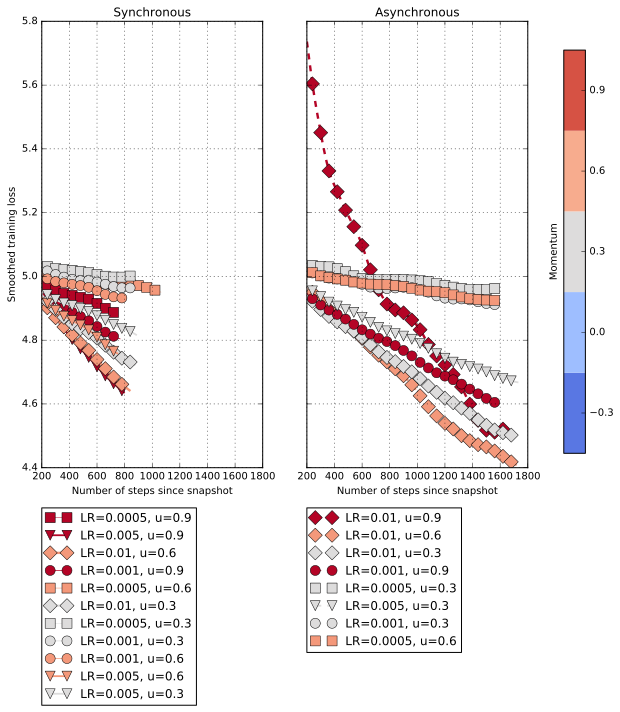

In [27]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=True, marker_dict=marker_dict, mark_every=60)
#,axis=[None, None, 5.05, 5.20])

## Parameter space loss contours 

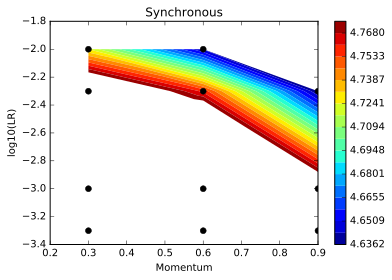

In [28]:
plot_loss_contour(loss_results, window=WINDOW, sync=True)

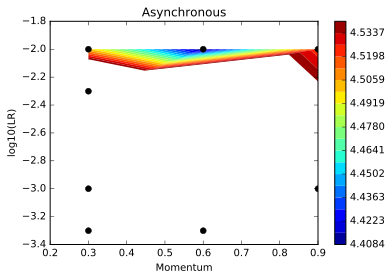

In [29]:
plot_loss_contour(loss_results, window=WINDOW, sync=False)

## Only plot the best run for each momentum value in each mode 

In [30]:
dict_of_winners = get_best_for_each_momentum(loss_results,WINDOW)

### DASHED = ASYNC
### SOLID = SYNC

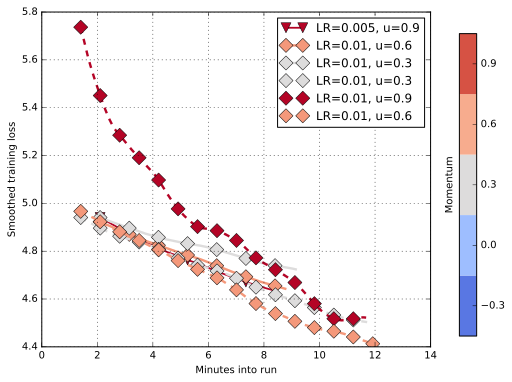

In [31]:
f = plot_all_runs(dict_of_winners, window=WINDOW, two_panels=False, marker_dict=marker_dict, mark_every=100,
                 sync_seconds_per_batch=SYNC_SECONDS_PER_BATCH, async_seconds_per_batch=ASYNC_SECONDS_PER_BATCH,
                 CG=M)

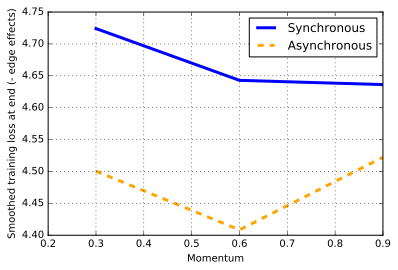

In [37]:
f=plot_momentum_dependence(loss_results, WINDOW)

In [38]:
f.savefig('experiment2_v0.9-mom-comparison.png', bbox_inches='tight', pad_inches=0.1)

## Plot winning curves along with evaluation loss level 

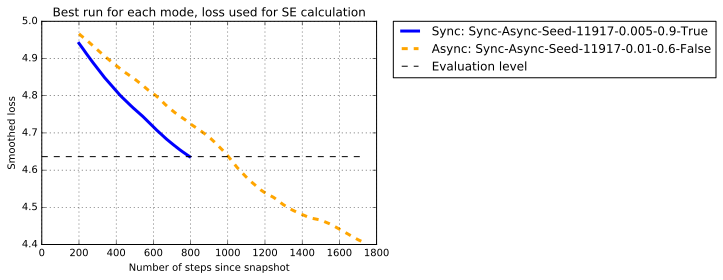

In [33]:
f=plot_se_calculation(loss_results, WINDOW)

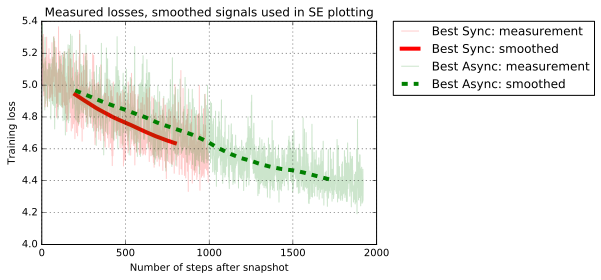

In [34]:
f=plot_winners_snr(loss_results, WINDOW)

# Plot HE-SE

[ 0.90361446  0.46850599]


plotting.py:330: RuntimeWarning: invalid value encountered in less_equal
  async_meets_target = np.argmax(a <= target)
plotting.py:331: RuntimeWarning: invalid value encountered in less_equal
  sync_meets_target = np.argmax(s <= target)


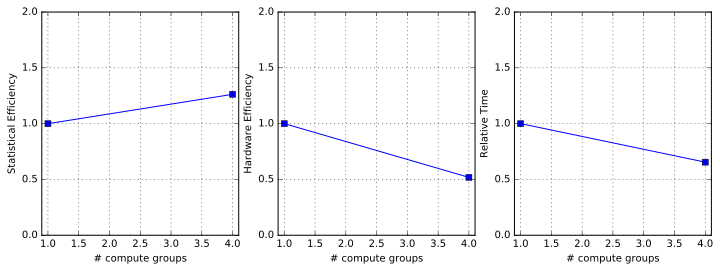

In [35]:
f = plot_se_he(loss_results, WINDOW, M)

In [31]:
f.savefig('experiment2_v0.9-se-he.png', bbox_inches='tight', pad_inches=0.1)